<a href="https://colab.research.google.com/github/docheem/NLP-Portfolio/blob/main/PR_NLP_Text_processing_Pipeline_WebScraping_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring and Processing Text Data

Preprocessing involves transforming raw text data into an understandable format. Real-world data is often incomplete, inconsistent, and filled with a lot of noise, and is likely to contain many errors.

Preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw text data for further processing.

Converting Text Data to Lowercase

In [ ]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people ',
        'Machine learning is the new electrcity',
        'There would be less hype around AI and more action going forward',
        'python is the best tool!','R is good langauage',
        'I like this book',
        'I want more books like this']

In [ ]:
# converting the list to dataframe
import pandas as pd


lower_df = pd.DataFrame({'tweet':text})
lower_df



,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


 Execute the lower() function on the text data

In [ ]:
x = 'TESTING'
x2 = x.lower()
print(x2)


testing


In [ ]:
# perform lowercasing on a data frame

lower_df['tweet'] = lower_df['tweet'].str.lower()


#lower_df['tweet'] = lower_df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

lower_df['tweet']


0                          this is introduction to nlp
1                it is likely to be useful, to people 
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

Removing Punctuation

In [ ]:
import re

s = "I. like. This book!"
s1 = re.sub(r'[^\w\s]','',s)
s1

'I like This book'

In [ ]:
# Applyinh this function to our tweets/df

lower_df['tweet'] = lower_df['tweet'].str.replace('[^\w\s]','')
lower_df['tweet']

<ipython-input-88-d19f427b08d9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lower_df['tweet'] = lower_df['tweet'].str.replace('[^\w\s]','')


0                          this is introduction to nlp
1                 it is likely to be useful to people 
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                              python is the best tool
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

Removing Stop Words

In [ ]:
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electrcity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good langauage
6,I like this book
7,I want more books like this


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop = stopwords.words('english')

df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


df['tweet']

0                                This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action going f...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: tweet, dtype: object

Standardizing Text

Most textual data is in customer reviews, blogs, or tweets, where there is a high chance of people using short words and abbreviations to represent the same meaning. This may help the downstream process to easily understand and resolve the semantics of the text.


In [ ]:
#  Creating a custom lookup dictionary

lookup_dict = {'nlp':'natural language processing',
               'ur':'your',
               "wbu" : "what about you"}


In [ ]:
import re

def text_std(input_text):

 words = input_text.split()

 new_words = []

 for word in words:

     word = re.sub(r'[^\w\s]','',word)

     if word.lower() in lookup_dict:

         word = lookup_dict[word.lower()]

         new_words.append(word)

         new_text = " ".join(new_words)

 return new_text

text_std("I like nlp it's ur choice")

'natural language processing your'

Correcting Spelling

Most text data is in customer reviews, blogs, or tweets, where there is a high chance of people using short words and making typo errors.

This reduces multiple copies of words, which represent the same meaning. For example, “proccessing” and “processing” are treated as different words even if used in the same sense.

Note: that abbreviations should be handled before this step, or else the corrector would fail at times

In [ ]:
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [ ]:
# Execute spelling correction on the text data

#Install textblob library
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import libraries and use 'correct' function

from textblob import TextBlob


In [ ]:
df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

#You can also use autocorrect library as shown below

#install autocorrect

!pip install autocorrect


from autocorrect import Speller

speller = Speller()
result = speller('mussage')
result2 = speller('sirvice')#, 'sirvice')
print(result)
print(result2)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
message
service


Tokenizing Text

Tokenization refers to splitting text into minimal meaningful units. There is a sentence tokenizer and a word tokenizer.

It is a mandatory step in text preprocessing for any kind of analysis. There are many libraries to perform tokenization like NLTK, spaCy, and TextBlob

In [ ]:
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Using textblob
from textblob import TextBlob

TextBlob(df['tweet'][3]).words


WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [ ]:
#Create Data

my_string = 'My favorite animal is cat'
nltk.word_tokenize(my_string)

['My', 'favorite', 'animal', 'is', 'cat']

In [ ]:
#using the split function from python

my_string.split()


['My', 'favorite', 'animal', 'is', 'cat']

Stemming

Stemming is the process of extracting a root word. For example, fish, fishes, and fishing are stemmed into fish.

In [ ]:
# Create Data

tweet_text = ['I like fishing','I eat fish','There are many fishes in pound']

# Convert list to df

list_df = pd.DataFrame({'tweet': tweet_text})
list_df



,tweet
0,I like fishing
1,I eat fish
2,There are many fishes in pound


In [ ]:
# Stem the text

from nltk.stem import PorterStemmer

st = PorterStemmer()

my_stem = list_df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
my_stem


0                     i like fish
1                      i eat fish
2    there are mani fish in pound
Name: tweet, dtype: object

Lemmatizing

lemmatization is the process of extracting a root word by considering the vocabulary. For example, good, better, or best is lemmatized into good.

In [ ]:
d_text=['I like fishing','I eat fish','There are many fishes in pound',
'leaves and leaf']

#convert list to dataframe
import pandas as pd

lem_df = pd.DataFrame({'tweet': d_text})
lem_df

,tweet
0,I like fishing
1,I eat fish
2,There are many fishes in pound
3,leaves and leaf


In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lem_df['tweet'] = lem_df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize()for word in x.split()]))

lem_df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tweet
0,I like fishing
1,I eat fish
2,There are many fish in pound
3,leaf and leaf


Exploring Text Data

In [ ]:
#nltk.download()
#Importing data
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [ ]:
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

In [ ]:
wt_sentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [ ]:
wt_words

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

In [ ]:
# Count the number of words

len(wt_sentences)

1138

In [ ]:
len(wt_words)

102457

In [ ]:
# Compute the frequency of all words in the reviews

frequency_dist = nltk.FreqDist(wt_words)

freqdf = pd.DataFrame(list(frequency_dist.items()),
                      columns=['Word', 'Frequency'])
freqdf

,Word,Frequency
0,Cookie,22
1,Manager,179
2,:,466
3,"""",1971
4,Don,21
...,...,...
8291,DoS,1
8292,distracting,1
8293,whell,1
8294,heights,1


In [ ]:
sorted_frequency_dist = sorted(frequency_dist,
                               key = frequency_dist.__getitem__,
                               reverse = True)


#sorted_frequency_dist

Consider words with length greater than 3 and plot

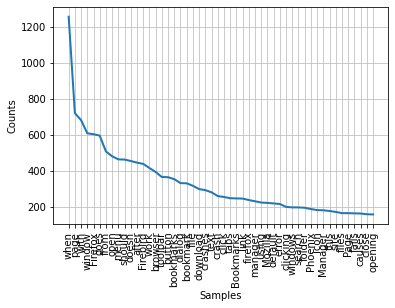

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])

frequency_dist = nltk.FreqDist(large_words)

frequency_dist.plot(50,cumulative = False)

Build a word cloud

In [ ]:
#install library
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#build wordcloud
from wordcloud import WordCloud

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

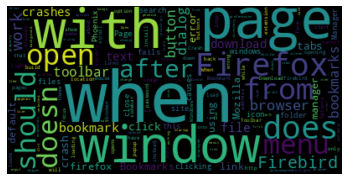

In [ ]:
#plotting the wordcloud
import matplotlib.pyplot as plt

plt.imshow(wcloud, interpolation="bilinear")

plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

plt.show()
#output

# Building a Text Preprocessing Pipeline

Building an end-to-end text preprocessing pipeline. Whenever we want to do preprocessing for any NLP application, we can directly plug data into this pipeline function and get the required clean text data as the output.

We weill put all the possible processing techniques into a wrapper function and passing the data through it.

In [ ]:
tweet_sample= """How to take control of your
#debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.
#Best advice for #family#financial #success (@PrepareToWin)"""




In [ ]:

def processRow(row):

    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize

    tweet = row

    #Lower case
    tweet.lower()

    #Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)

    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)

    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)

    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)

    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)

    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    #Remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')

    #remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()])

    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)

    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)

    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)

    #lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])

    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])

    #Removes emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', tweet)

    #trim
    tweet = tweet.strip('\'"')

    row = tweet

    return row

#call the function with your data
processRow(tweet_sample)

'How to take control of your debt URL Best advice for family financial success AT_USER'

#Twitter Web Scraping

Extracting the content/data from websites twitter

In [ ]:
# STEP 1 We want to cellect data using twitter API
# Twitter data can gives a business tremendous insights about their company, product, service, and so forth.
# We wil login to the twitter developer portal to create our app in order to get our API key/secret and bearer token.
# We will also import the necessary librararies.

!pip install tweepy # #Tweepy help us fetch the data

import pandas as pd
import numpy as np
import tweepy
import json
import requests
from tweepy import OAuthHandler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Set your API key, API secret, and bearer token

api_key = "0WEEKO0OcGSZJ7bdkFZczReFp"

api_secret = "DKLfa0HKaHUKErO5PBiG6SnkytF1bWHAnNYL2jSaCH0W4i98O1"

bearer_token = "AAAAAAAAAAAAAAAAAAAAAFyClQEAAAAAkDdSDfrpDJUcS5zf%2FQslLZL3iHc%3DsictQLE9ZaHVULnYDQcj6QnpdrpjpbV9k9XPJ6lficWtGjPqMG"

In [ ]:
# Set the endpoint URL
endpoint = "https://api.twitter.com/2/tweets/search/recent"

# Set the search query and other parameters
params = {"query": "AI Natural language processing",
          "max_results": "100"}

In [ ]:
# Create the authorization dictionary header
headers = {"Authorization": f"Bearer {bearer_token}",
          "User-Agent": "Dochee API"}



In [ ]:
# Send the GET request
response = requests.get(endpoint, params=params, headers=headers)

In [ ]:
# Check for a successful request

if response.status_code == 1000:

    # Parse the JSON response
    json_data = json.loads(response.text)

    # Iterate through the tweets
    for item in json_data["data"]:

        # Print the tweet text
        print(item["text"])
else:
    # Print the error message
    print(response.text)

{"data":[{"edit_history_tweet_ids":["1634254588705402880"],"id":"1634254588705402880","text":"@DenyTheMark2020 @KanekoaTheGreat @TuckerCarlson Stingray AI \" leverages the power of machine learning and natural language processing to rapidly and automatically extract unstructured data, gain deep insight into patterns and trends hidden inside content, and optimize content for any communication platform or channel.\""},{"edit_history_tweet_ids":["1634247852963553280"],"id":"1634247852963553280","text":"RT @CHARBELNEMNOM: \uD83E\uDD16 BLOGGED: #AI has taken over much of the limelight in 2023. Perhaps the most popular of these has been #ChatGPT, a stat…"},{"edit_history_tweet_ids":["1634240923457470472"],"id":"1634240923457470472","text":"RT @futuurHQ: Share your predictions for the future of #ArtificialIntelligence! When will we see chatbots on Google search, GPT4, and other…"},{"edit_history_tweet_ids":["1634238347315953668"],"id":"1634238347315953668","text":"RT @CohereAI: (1/12) \uD83D\

In [ ]:
NLP_frame = pd.DataFrame(response)
NLP_frame

,0
0,"b'{""data"":[{""edit_history_tweet_ids"":[""1634254..."
1,"b'@TuckerCarlson Stingray AI \\"" leverages the..."
2,"b'ly extract unstructured data, gain deep insi..."
3,"b'munication platform or channel.\\""""},{""edit_..."
4,b'RBELNEMNOM: \\uD83E\\uDD16 BLOGGED: #AI has ...
...,...
228,b'e interact with AI. With advanced natural la...
229,"b' including healthcare, finance, and customer..."
230,"b'992"",""text"":""5/8: $GPT is the future of AI t..."
231,"b', GPT has the potential to revolutionize ind..."


In [ ]:
new_df = NLP_frame.reset_index().rename(columns = {0:'word_tweets'})
new_df


,index,word_tweets
0,0,"b'{""data"":[{""edit_history_tweet_ids"":[""1634254..."
1,1,"b'@TuckerCarlson Stingray AI \\"" leverages the..."
2,2,"b'ly extract unstructured data, gain deep insi..."
3,3,"b'munication platform or channel.\\""""},{""edit_..."
4,4,b'RBELNEMNOM: \\uD83E\\uDD16 BLOGGED: #AI has ...
...,...,...
228,228,b'e interact with AI. With advanced natural la...
229,229,"b' including healthcare, finance, and customer..."
230,230,"b'992"",""text"":""5/8: $GPT is the future of AI t..."
231,231,"b', GPT has the potential to revolutionize ind..."


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        233 non-null    int64 
 1   word_tweets  233 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.8+ KB
